In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
ll = pd.read_excel('latitude longitude.xlsx')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [5]:
df.shape

(13320, 9)

In [6]:
df1 = df.drop(columns = ['availability','society','balcony'])

In [7]:
df1.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df1.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df1 = df1.dropna()

In [10]:
df1['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [11]:
df1['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [12]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def total_sqft(x):
    try:
        x = float(x)
        return x
    except:
        try :
            a,b = x.split('-')
            res = (float(a)+float(b))/2
            return res
        except:
            return None

In [14]:
df1['total_sqft'] = df1['total_sqft'].apply(total_sqft)

In [15]:
total_sqft(4)

4.0

In [16]:
total_sqft('1-2')

1.5

In [17]:
total_sqft('3.m')

In [18]:
df1.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [19]:
df1 = df1.dropna()

In [20]:
df1.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [21]:
df1['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [22]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
def on_size(x):
    a,b = x.split(' ')
    return float(a)

In [24]:
df1['size'] = df1['size'].apply(on_size)

In [25]:
df1['size'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., 27., 10., 19.,
       16., 43., 14., 12., 13., 18.])

In [26]:
df1['location'].value_counts()

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [27]:
df1.head(40)

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,51.00
5,Super built-up Area,Whitefield,2.0,1170.0,2.0,38.00
6,Super built-up Area,Old Airport Road,4.0,2732.0,4.0,204.00
7,Super built-up Area,Rajaji Nagar,4.0,3300.0,4.0,600.00
8,Super built-up Area,Marathahalli,3.0,1310.0,3.0,63.25
9,Plot Area,Gandhi Bazar,6.0,1020.0,6.0,370.00


In [28]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [29]:
df1['area']=df1.area_type.map({'Super built-up Area':0,'Plot Area':1,'Built-up Area':2,'Carpet Area':3}) # not working

In [30]:
df1.head()

,area_type,location,size,total_sqft,bath,price,area
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,39.07,NaN
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,120.00,NaN
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,62.00,NaN
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,95.00,NaN
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,51.00,NaN


In [31]:
df1 = df1.drop(columns = 'area')

In [32]:
df1.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,51.00


In [33]:
import sklearn 
from sklearn.preprocessing import LabelEncoder

In [34]:
label = LabelEncoder()

In [35]:
l = label.fit_transform(df1['area_type'])

In [36]:
df1['area_type'] = l

In [37]:
df1.head()

,area_type,location,size,total_sqft,bath,price
0,3,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,2,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,0,Uttarahalli,3.0,1440.0,2.0,62.00
3,3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,3,Kothanur,2.0,1200.0,2.0,51.00


In [38]:
d = df1['location'].value_counts()

In [39]:
df1.head()

,area_type,location,size,total_sqft,bath,price
0,3,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,2,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,0,Uttarahalli,3.0,1440.0,2.0,62.00
3,3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,3,Kothanur,2.0,1200.0,2.0,51.00


In [40]:
df1.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [41]:
df1.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [42]:
ll.columns 

Index(['Column1', 'Column2', 'Column3'], dtype='object')

In [43]:
ll.columns = ['location','latitude','longitude']

In [44]:
ll.columns

Index(['location', 'latitude', 'longitude'], dtype='object')

In [45]:
new = pd.merge(df1,ll)

In [46]:
new.head()

,area_type,location,size,total_sqft,bath,price,latitude,longitude
0,3,Kothanur,2.0,1200.0,2.0,51.0,13.055616,77.635355
1,2,Kothanur,3.0,2400.0,2.0,150.0,13.055616,77.635355
2,3,Kothanur,3.0,1828.0,3.0,110.0,13.055616,77.635355
3,3,Kothanur,2.0,1186.0,2.0,58.0,13.055616,77.635355
4,3,Kothanur,3.0,1577.0,3.0,70.0,13.055616,77.635355


In [47]:
new_ = new.dropna()

In [48]:
new_ = new_.drop('location',axis='columns')

In [49]:
new_.head()

,area_type,size,total_sqft,bath,price,latitude,longitude
0,3,2.0,1200.0,2.0,51.0,13.055616,77.635355
1,2,3.0,2400.0,2.0,150.0,13.055616,77.635355
2,3,3.0,1828.0,3.0,110.0,13.055616,77.635355
3,3,2.0,1186.0,2.0,58.0,13.055616,77.635355
4,3,3.0,1577.0,3.0,70.0,13.055616,77.635355


In [50]:
new_.dtypes

area_type       int32
size          float64
total_sqft    float64
bath          float64
price         float64
latitude      float64
longitude     float64
dtype: object

In [51]:
for i in new_.columns:
    x_mean = np.mean(new_[i])
    x_std = np.std(new_[i])
    for j in new_[i]:
        z = (j-x_mean)/x_std
        if z>3 or z<-3:
            j = 0

In [52]:
new_.isnull().sum()

area_type     0
size          0
total_sqft    0
bath          0
price         0
latitude      0
longitude     0
dtype: int64

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
cr = new_.corr()

In [55]:
cr

,area_type,size,total_sqft,bath,price,latitude,longitude
area_type,1.000000,-0.148013,-0.080076,-0.127701,-0.094257,0.014522,0.055271
size,-0.148013,1.000000,0.284797,0.894639,0.484854,0.065656,-0.058693
total_sqft,-0.080076,0.284797,1.000000,0.315434,0.466425,0.090854,0.012686
bath,-0.127701,0.894639,0.315434,1.000000,0.540252,0.101847,-0.011323
price,-0.094257,0.484854,0.466425,0.540252,1.000000,0.087817,0.017851
latitude,0.014522,0.065656,0.090854,0.101847,0.087817,1.000000,0.017360
longitude,0.055271,-0.058693,0.012686,-0.011323,0.017851,0.017360,1.000000


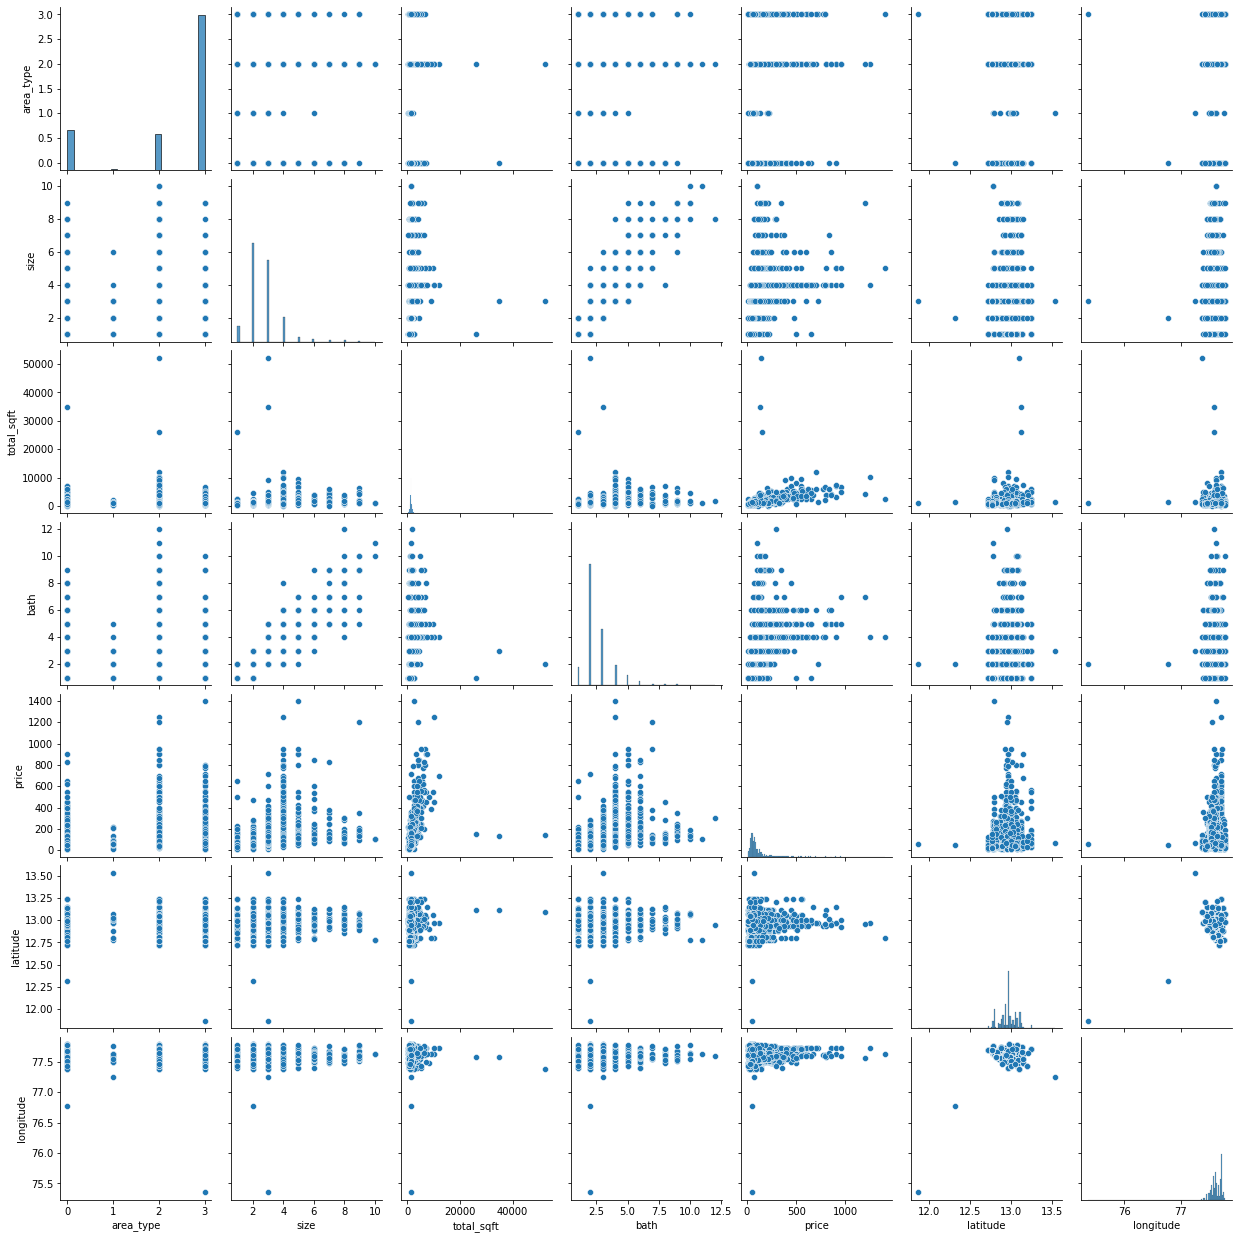

In [56]:
sns.pairplot(new_)

In [57]:
for i in new_.columns:
    print(new_[i].unique)

<bound method Series.unique of 0       3
1       2
2       3
3       3
4       3
       ..
3075    3
3076    2
3077    2
3078    3
3079    0
Name: area_type, Length: 3080, dtype: int32>
<bound method Series.unique of 0       2.0
1       3.0
2       3.0
3       2.0
4       3.0
       ... 
3075    2.0
3076    4.0
3077    2.0
3078    2.0
3079    2.0
Name: size, Length: 3080, dtype: float64>
<bound method Series.unique of 0       1200.0
1       2400.0
2       1828.0
3       1186.0
4       1577.0
         ...  
3075     905.0
3076     612.0
3077    1000.0
3078    1201.0
3079    1305.0
Name: total_sqft, Length: 3080, dtype: float64>
<bound method Series.unique of 0       2.0
1       2.0
2       3.0
3       2.0
4       3.0
       ... 
3075    2.0
3076    3.0
3077    2.0
3078    2.0
3079    2.0
Name: bath, Length: 3080, dtype: float64>
<bound method Series.unique of 0        51.0
1       150.0
2       110.0
3        58.0
4        70.0
        ...  
3075     50.0
3076     47.0
3077     35.0
307

In [58]:
new_.shape

(3080, 7)

In [59]:
new_=new_.drop(0)

In [60]:
new_.shape

(3079, 7)

C:\Users\absha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_type'>

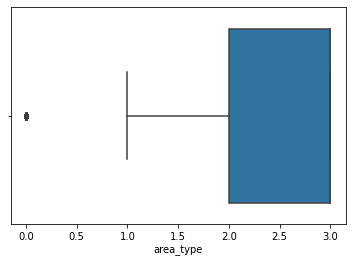

In [61]:
sns.boxplot(new_['area_type'])

In [62]:
def outlier_removal(arg):
    Q1 = np.percentile(arg,25)
    Q3 = np.percentile(arg,75)
    IQR = Q3-Q1
    upper = (1.5*IQR)+Q3
    lower = Q1-(1.5*IQR)
    arg = arg[arg>=lower]
    arg = arg[upper>=arg]
    return arg

In [63]:
new_['area_type']=outlier_removal(new_['area_type'])

In [64]:
new_['size'] = outlier_removal(new_['size'])

In [65]:
new_['total_sqft'] = outlier_removal(new_['total_sqft'])
new_['bath'] = outlier_removal(new_['bath'])
new_['latitude'] = outlier_removal(new_['latitude'])
new_['longitude'] = outlier_removal(new_['longitude'])

In [66]:
new_.isnull().sum()

area_type     537
size          152
total_sqft    270
bath          221
price           0
latitude       43
longitude      11
dtype: int64

In [67]:
new_=new_.dropna()

In [68]:
X = new_.drop(columns = 'price')
Y = new_['price']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [71]:
x_train.shape

(1762, 6)

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
model1 = RandomForestRegressor()

In [74]:
model1.fit(x_train,y_train)

RandomForestRegressor()

In [75]:
y_pred = model1.predict(x_test)

In [76]:
check = np.array([3,2.0,1200.0,2.0,13.055616,77.635355])


In [77]:
prediction = model1.predict(check.reshape(1,-1))

C:\Users\absha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [78]:
abs(prediction)

array([57.41771429])

In [79]:
check1 = np.array([2,3.0,2400.0,2.0,13.055616,77.635355])

In [80]:
p = model1.predict(check1.reshape(1,-1))

C:\Users\absha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [81]:
abs(p)

array([147.665])

In [82]:
model1.score(X,Y)

0.8513651766107987

In [83]:
import pickle

In [85]:
pickle.dump(model1,open('bengalauru_housemodel.txt','wb'))

In [86]:
pickle.load(open('bengalauru_housemodel.txt','rb'))

RandomForestRegressor()